In [2]:
#P0
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import torch

In [4]:
from a2code import get_data_loader

In [5]:
#from assignment doc
# This will download the CIFAR-10 dataset to a folder called "data"
# the first time you run this code.
train_loader, val_loader, test_loader, classes = get_data_loader(
    target_classes=["cat", "dog"], 
    batch_size=1)

Files already downloaded and verified
Files already downloaded and verified


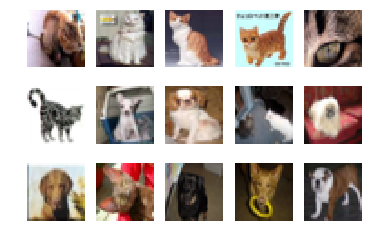

In [6]:
#P1A
#from assignment doc
k = 0
for images, labels in train_loader:
    # since batch_size = 1, there is only 1 image in `images`
    image = images[0]
    # place the colour channel at the end, instead of at the beginning
    img = np.transpose(image, [1,2,0])
    # normalize pixel intensity values to [0, 1]
    img = img / 2 + 0.5
    plt.subplot(3, 5, k+1)
    plt.axis('off')
    plt.imshow(img)

    k += 1
    if k > 14:
        break

In [6]:
#P1B
print(len(train_loader))
print(len(val_loader))
print(len(test_loader))

8000
2000
2000


In [7]:
#P1C
# Since the validation set is never involved in the training process, it is used to accurately judge performance.
# If the training set less/error is used, the predicted performance is too high and applicable only for known datasets.

In [6]:
#from assignment doc
import torch.nn as nn
import torch.nn.functional as F

class LargeNet(nn.Module):
    def __init__(self):
        super(LargeNet, self).__init__()
        self.name = "large"
        self.conv1 = nn.Conv2d(3, 5, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(5, 10, 5)
        self.fc1 = nn.Linear(10 * 5 * 5, 32)
        self.fc2 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 10 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [7]:
#from assignment doc
class SmallNet(nn.Module):
    def __init__(self):
        super(SmallNet, self).__init__()
        self.name = "small"
        self.conv = nn.Conv2d(3, 5, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(5 * 7 * 7, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv(x)))
        x = self.pool(x)
        x = x.view(-1, 5 * 7 * 7)
        x = self.fc(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [10]:
#from assignment doc
small_net = SmallNet()
large_net = LargeNet()

In [11]:
#P2A
#from assignment doc
for param in small_net.parameters():
    print(param.shape)

torch.Size([5, 3, 3, 3])
torch.Size([5])
torch.Size([1, 245])
torch.Size([1])


In [12]:
for param in large_net.parameters():
    print(param.shape)

torch.Size([5, 3, 5, 5])
torch.Size([5])
torch.Size([10, 5, 5, 5])
torch.Size([10])
torch.Size([32, 250])
torch.Size([32])
torch.Size([1, 32])
torch.Size([1])


In [13]:
# number of parameters in small_net
print(5*3*3*3 + 5 + 1*245 + 1)
# number of parameters in large_net
print(5*3*5*5 + 5 + 10*5*5*5 + 10 + 32*250 + 32 + 1*32 + 1)

386
9705


In [14]:
#P2B
#from assignment doc
from a2code import train_net

In [15]:
#from a2code: "def train_net(net, batch_size=64, learning_rate=0.01, num_epochs=30)"

In [16]:
#P2C
train_net(small_net) #Total time elapsed: 236.63 seconds

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.42025, Train loss: 0.6707413072586059 |Validation err: 0.386, Validation loss: 0.6587143167853355
Epoch 2: Train err: 0.36825, Train loss: 0.648959363937378 |Validation err: 0.39, Validation loss: 0.6665013581514359
Epoch 3: Train err: 0.35575, Train loss: 0.6384201030731201 |Validation err: 0.3505, Validation loss: 0.6317092198878527
Epoch 4: Train err: 0.347125, Train loss: 0.6259360342025757 |Validation err: 0.3525, Validation loss: 0.6294044516980648
Epoch 5: Train err: 0.339375, Train loss: 0.6190446262359619 |Validation err: 0.3405, Validation loss: 0.6219762954860926
Epoch 6: Train err: 0.329625, Train loss: 0.6076635270118713 |Validation err: 0.3325, Validation loss: 0.6165589988231659
Epoch 7: Train err: 0.329, Train loss: 0.6007771029472351 |Validation err: 0.334, Validation loss: 0.6114235706627369
Epoch 8: Train err: 0.319, Train loss: 0.5938081650733947 |Validation err: 0.316,

In [ ]:
large_net = LargeNet()
train_net(large_net) #Total time elapsed: 274.86 seconds

In [17]:
#P2D
#from assignment doc
from a2code import plot_training_curve, get_model_name

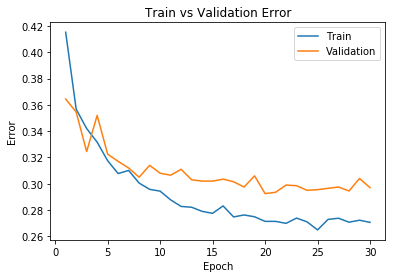

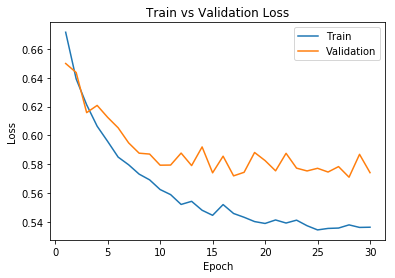

model_small_net_bs64_lr0.01_epoch30


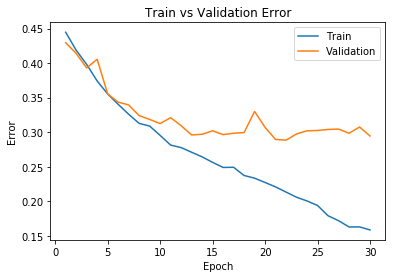

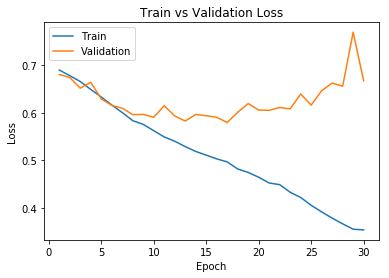

model_large_net_bs64_lr0.01_epoch30


In [19]:
plot_training_curve('model_small_bs64_lr0.01_epoch29')
print(get_model_name('small_net',64,0.01,30))

plot_training_curve('model_large_bs64_lr0.01_epoch29')
print(get_model_name('large_net',64,0.01,30))

In [20]:
#P2E
# differences: small_net's lowest validation error and loss end up slightly lower;
# small_net begins overfitting, large_net overfitting starts near epoch 15
# underfit/overfit: large_net's increasing valiadation loss implies overfit
# large_net's train error and loss plots are "straighter" (more consistent decrease) and end up lower (memorization)

In [21]:
#P3A
large_net = LargeNet()
train_net(large_net,learning_rate=0.001) #Total time elapsed: 294.70 seconds

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.47625, Train loss: 0.6928360085487366 |Validation err: 0.467, Validation loss: 0.6924686636775732
Epoch 2: Train err: 0.44875, Train loss: 0.6922589569091797 |Validation err: 0.4305, Validation loss: 0.6916492208838463
Epoch 3: Train err: 0.435625, Train loss: 0.6916066966056824 |Validation err: 0.4285, Validation loss: 0.6908543799072504
Epoch 4: Train err: 0.43, Train loss: 0.6908613400459289 |Validation err: 0.425, Validation loss: 0.6896595563739538
Epoch 5: Train err: 0.434375, Train loss: 0.689919439792633 |Validation err: 0.4195, Validation loss: 0.6886940132826567
Epoch 6: Train err: 0.435875, Train loss: 0.6887415542602539 |Validation err: 0.4195, Validation loss: 0.6867833845317364
Epoch 7: Train err: 0.437, Train loss: 0.6873774504661561 |Validation err: 0.4185, Validation loss: 0.6851979997009039
Epoch 8: Train err: 0.437375, Train loss: 0.6859259371757507 |Validation err: 0.41

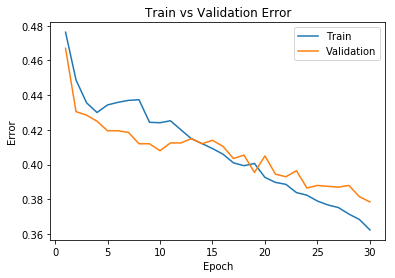

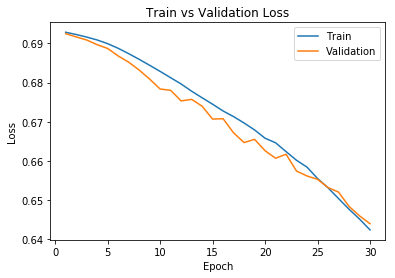

In [22]:
plot_training_curve('model_large_bs64_lr0.001_epoch29')

In [23]:
# Lowering the learning rate increases the training time slightly.
# The train and validation err and loss all end up higher than default.
# Validation err and loss have not found lowest points, underfit.
# The train and validation err/loss "seperate" less.

In [24]:
#P3B
large_net = LargeNet()
train_net(large_net,learning_rate=0.1) #Total time elapsed: 420.39 seconds

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.43025, Train loss: 0.6748926792144775 |Validation err: 0.366, Validation loss: 0.6361349448561668
Epoch 2: Train err: 0.367125, Train loss: 0.6393040843009948 |Validation err: 0.3815, Validation loss: 0.6402566395699978
Epoch 3: Train err: 0.359625, Train loss: 0.6289150710105896 |Validation err: 0.3415, Validation loss: 0.6203888300806284
Epoch 4: Train err: 0.3405, Train loss: 0.609216534614563 |Validation err: 0.3325, Validation loss: 0.6190137192606926
Epoch 5: Train err: 0.32625, Train loss: 0.5952581822872162 |Validation err: 0.338, Validation loss: 0.6185419615358114
Epoch 6: Train err: 0.322375, Train loss: 0.5884109420776367 |Validation err: 0.3305, Validation loss: 0.6343312105163932
Epoch 7: Train err: 0.303, Train loss: 0.5706156561374665 |Validation err: 0.3175, Validation loss: 0.5883922427892685
Epoch 8: Train err: 0.2865, Train loss: 0.5515982763767242 |Validation err: 0.33

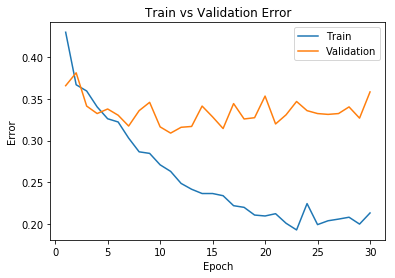

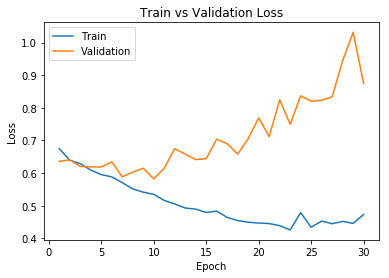

In [25]:
plot_training_curve('model_large_bs64_lr0.1_epoch29')

In [26]:
# Increasing the learning rate increases the training time.
# Increased learning rate makes changes in err and loss more drastic. (more noise)
# Train err and loss end up slightly higher than default.
# Increased learn rate's lowest validation err and loss end up slightly higher.
# Validation err and loss reaches lowest point sooner, and rockets. (overfit)

In [27]:
#P3C
large_net = LargeNet()
train_net(large_net,batch_size=512) #Total time elapsed: 360.26 seconds

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.48175, Train loss: 0.6929379403591156 |Validation err: 0.478, Validation loss: 0.6926823854446411
Epoch 2: Train err: 0.457625, Train loss: 0.6924103945493698 |Validation err: 0.434, Validation loss: 0.6917425096035004
Epoch 3: Train err: 0.437, Train loss: 0.6916500516235828 |Validation err: 0.4265, Validation loss: 0.690913051366806
Epoch 4: Train err: 0.433625, Train loss: 0.6908450126647949 |Validation err: 0.424, Validation loss: 0.6897871196269989
Epoch 5: Train err: 0.434, Train loss: 0.6896936111152172 |Validation err: 0.424, Validation loss: 0.6881359070539474
Epoch 6: Train err: 0.43825, Train loss: 0.6883535087108612 |Validation err: 0.4285, Validation loss: 0.6860131323337555
Epoch 7: Train err: 0.439375, Train loss: 0.686687845736742 |Validation err: 0.426, Validation loss: 0.6836972385644913
Epoch 8: Train err: 0.43525, Train loss: 0.6849784776568413 |Validation err: 0.4115, 

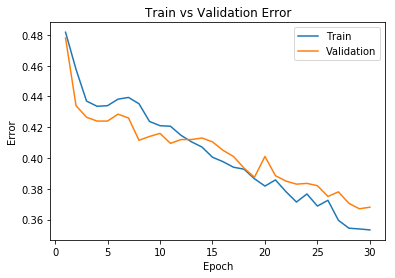

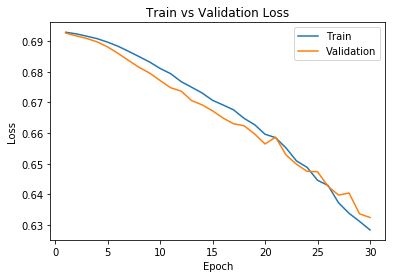

In [28]:
plot_training_curve('model_large_bs512_lr0.01_epoch29')

In [29]:
# Increasing the batch size increases the training time.
# Train and validation err and loss end up greater than default.
# Validation err and loss have not reached their lowerest point. (underfit)
# The train and validation err/loss "seperate" less.

In [30]:
#P3D
large_net = LargeNet()
train_net(large_net,batch_size=16) #Total time elapsed: 399.61 seconds

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.432, Train loss: 0.6775279330611229 |Validation err: 0.378, Validation loss: 0.6519268636703491
Epoch 2: Train err: 0.3695, Train loss: 0.6393923569917679 |Validation err: 0.357, Validation loss: 0.6232627277374267
Epoch 3: Train err: 0.340375, Train loss: 0.6116344970464707 |Validation err: 0.3535, Validation loss: 0.6428204464912415
Epoch 4: Train err: 0.316, Train loss: 0.5871043585538864 |Validation err: 0.3465, Validation loss: 0.6188597712516785
Epoch 5: Train err: 0.3035, Train loss: 0.5673562022447586 |Validation err: 0.301, Validation loss: 0.578966046333313
Epoch 6: Train err: 0.2895, Train loss: 0.5498159048557282 |Validation err: 0.3135, Validation loss: 0.5924660203456878
Epoch 7: Train err: 0.26775, Train loss: 0.5291197344958782 |Validation err: 0.2935, Validation loss: 0.5653185451030731
Epoch 8: Train err: 0.25475, Train loss: 0.5079697716534137 |Validation err: 0.3125, Va

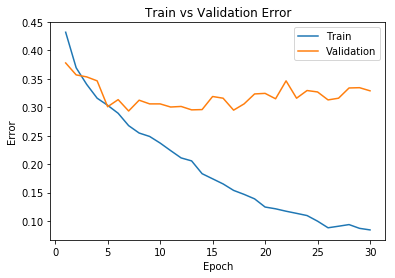

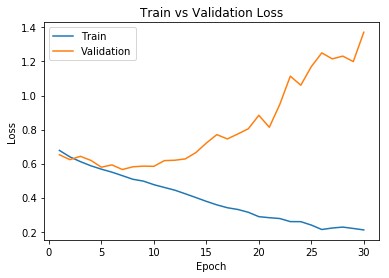

In [31]:
plot_training_curve('model_large_bs16_lr0.01_epoch29')

In [32]:
# Decreasing the batch size increases the training time.
# Train err and loss end up lower than default.
# Lowest validation err and loss about the same as default.
# Bottoms out sooner.
# Overfit starting at epoch 7.

In [33]:
#P4A
# Since the validation error and loss are the key values, I would use the default values for best results.
# Don't fix what's not broken.
#P4B
large_net = LargeNet()
train_net(large_net) #Total time elapsed: 280.73 seconds

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.444625, Train loss: 0.6900222663879394 |Validation err: 0.4295, Validation loss: 0.6807658914476633
Epoch 2: Train err: 0.418625, Train loss: 0.678187626838684 |Validation err: 0.414, Validation loss: 0.6742459870874882
Epoch 3: Train err: 0.398125, Train loss: 0.665838011264801 |Validation err: 0.393, Validation loss: 0.6518606562167406
Epoch 4: Train err: 0.374125, Train loss: 0.6491767945289612 |Validation err: 0.4055, Validation loss: 0.6640396397560835
Epoch 5: Train err: 0.355375, Train loss: 0.633286967754364 |Validation err: 0.3555, Validation loss: 0.6293385177850723
Epoch 6: Train err: 0.340375, Train loss: 0.6163978269100189 |Validation err: 0.3435, Validation loss: 0.61557044275105
Epoch 7: Train err: 0.326, Train loss: 0.6004614448547363 |Validation err: 0.3395, Validation loss: 0.6096945609897375
Epoch 8: Train err: 0.31275, Train loss: 0.5834928033351898 |Validation err: 0.3

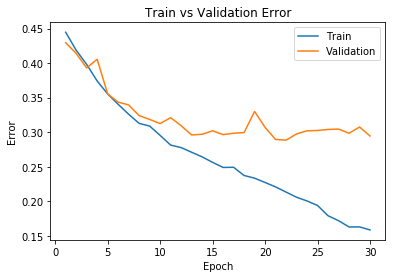

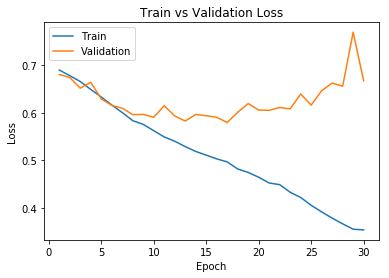

In [34]:
plot_training_curve('model_large_bs64_lr0.01_epoch29')

In [35]:
#P4C
# For curiosity, try increased learn rate and decreased batch size
#P4D
large_net = LargeNet()
train_net(large_net,learning_rate=0.1,batch_size=16) #Total time elapsed: 294.19 seconds

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.47025, Train loss: 0.6904655606746674 |Validation err: 0.509, Validation loss: 0.696020254611969
Epoch 2: Train err: 0.500625, Train loss: 0.6966381633281707 |Validation err: 0.509, Validation loss: 0.6940917444229125
Epoch 3: Train err: 0.476125, Train loss: 0.6937552279829979 |Validation err: 0.4865, Validation loss: 0.6928137373924256
Epoch 4: Train err: 0.469625, Train loss: 0.69198251080513 |Validation err: 0.4925, Validation loss: 0.6971833891868592
Epoch 5: Train err: 0.464, Train loss: 0.6908169710636138 |Validation err: 0.4125, Validation loss: 0.6767571220397949
Epoch 6: Train err: 0.463625, Train loss: 0.6898253170251847 |Validation err: 0.491, Validation loss: 0.7024569387435913
Epoch 7: Train err: 0.473375, Train loss: 0.6908802160024643 |Validation err: 0.503, Validation loss: 0.6919910268783569
Epoch 8: Train err: 0.476375, Train loss: 0.6925749679207802 |Validation err: 0.4

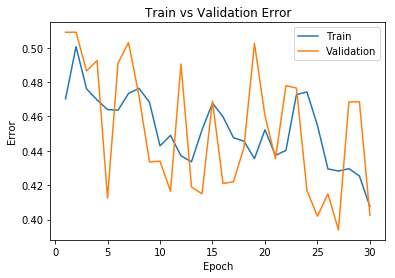

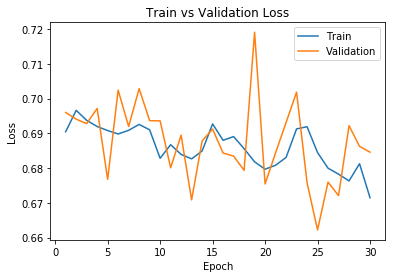

In [36]:
plot_training_curve('model_large_bs16_lr0.1_epoch29') #oh no

In [18]:
#P5A
#from assignment doc
#choose small_net default epoch 21
net = SmallNet()
model_path = get_model_name(net.name, batch_size=64, learning_rate=0.01, epoch=21)
state = torch.load(model_path)
net.load_state_dict(state)

In [ ]:
#P5B
# small_net epoch 21 has one of the lowest validation error (0.2935) and loss (0.5755386482924223).

In [19]:
#P5C
#from a2code import normalize_label

def normalize_label(labels):
    max_val = torch.max(labels)
    min_val = torch.min(labels)
    norm_labels = (labels - min_val)/(max_val - min_val)

    return norm_labels


total_err = 0.0
total_epoch = 0
for i, data in enumerate(test_loader,0):
    inputs, labels = data
    #labels = normalize_label(labels)
    outputs = net(inputs)
    corr = (outputs > 0.0).squeeze().long() != labels
    total_err += int(corr.sum())
    total_epoch += len(labels)
err = float(total_err) / total_epoch
print(err)

1.0


In [ ]:
#P5D
# The model's training is based on the test data set. If the test data set is used to judge model performance, the model will memorize the test data set to improce apparent performance.